# 분석

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
p_info = pd.read_csv('/content/drive/MyDrive/lgaimers3/product_info.csv')
brand = pd.read_csv('/content/drive/MyDrive/lgaimers3/brand_keyword_cnt.csv')
sales = pd.read_csv('/content/drive/MyDrive/lgaimers3/sales.csv')
sub = pd.read_csv('/content/drive/MyDrive/lgaimers3/sample_submission.csv')
train = pd.read_csv('/content/drive/MyDrive/lgaimers3/train.csv')
train.head()

ID                제품             대분류             중분류             소분류  \
0   0  B002-00001-00001  B002-C001-0002  B002-C002-0007  B002-C003-0038   
1   1  B002-00002-00001  B002-C001-0003  B002-C002-0008  B002-C003-0044   
2   2  B002-00002-00002  B002-C001-0003  B002-C002-0008  B002-C003-0044   
3   3  B002-00002-00003  B002-C001-0003  B002-C002-0008  B002-C003-0044   
4   4  B002-00003-00001  B002-C001-0001  B002-C002-0001  B002-C003-0003   

          브랜드  2022-01-01  2022-01-02  2022-01-03  2022-01-04  ...  \
0  B002-00001           0           0           0           0  ...   
1  B002-00002           0           0           0           0  ...   
2  B002-00002           0           0           0           0  ...   
3  B002-00002           0           0           0           0  ...   
4  B002-00003           0           0           0           0  ...   

   2023-03-26  2023-03-27  2023-03-28  2023-03-29  2023-03-30  2023-03-31  \
0           0           0           0           0           0           0   
1           0           0           0           1           3           2   
2           0           0           0           0           0           0   
3           0           0           0           0           0           0   
4           0           0           0           0           0           0   

   2023-04-01  2023-04-02  2023-04-03  2023-04-04  
0           0           0           0           0  
1           0           0           2           0  
2           0           0           0           0  
3           0           0           0           0  
4           0           0           0           0  

[5 rows x 465 columns]

In [ ]:
sales.head()

ID                제품             대분류             중분류             소분류  \
0   0  B002-00001-00001  B002-C001-0002  B002-C002-0007  B002-C003-0038   
1   1  B002-00002-00001  B002-C001-0003  B002-C002-0008  B002-C003-0044   
2   2  B002-00002-00002  B002-C001-0003  B002-C002-0008  B002-C003-0044   
3   3  B002-00002-00003  B002-C001-0003  B002-C002-0008  B002-C003-0044   
4   4  B002-00003-00001  B002-C001-0001  B002-C002-0001  B002-C003-0003   

          브랜드  2022-01-01  2022-01-02  2022-01-03  2022-01-04  ...  \
0  B002-00001           0           0           0           0  ...   
1  B002-00002           0           0           0           0  ...   
2  B002-00002           0           0           0           0  ...   
3  B002-00002           0           0           0           0  ...   
4  B002-00003           0           0           0           0  ...   

   2023-03-26  2023-03-27  2023-03-28  2023-03-29  2023-03-30  2023-03-31  \
0           0           0           0           0           0           0   
1           0           0           0       22400       67200       44800   
2           0           0           0           0           0           0   
3           0           0           0           0           0           0   
4           0           0           0           0           0           0   

   2023-04-01  2023-04-02  2023-04-03  2023-04-04  
0           0           0           0           0  
1           0           0       44800           0  
2           0           0           0           0  
3           0           0           0           0  
4           0           0           0           0  

[5 rows x 465 columns]

In [ ]:
len(train), len(sales), len(brand)

(15890, 15890, 3170)

In [ ]:
train['제품'].nunique(), train['대분류'].nunique(), train['중분류'].nunique(), train['소분류'].nunique(), train['브랜드'].nunique()

(15840, 5, 11, 53, 3170, 15890)

In [ ]:
sales['제품'].nunique(), sales['대분류'].nunique(), sales['중분류'].nunique(), sales['소분류'].nunique(), sales['브랜드'].nunique()

(15840, 5, 11, 53, 3170)

In [ ]:
train.iloc[:, 6:].sum(axis=1).nsmallest(10)

85

In [ ]:
sum(train.iloc[:, 6:].sum(axis=1) == 0)

85

In [ ]:
train.iloc[:, 6:].sum(axis=1).nlargest(10)

485      3118885
11595    2595146
12336    2535587
4470     2008250
3481     1414800
12347    1352881
3899     1213735
12339    1201059
11767    1187884
3900     1028450
dtype: int64

In [ ]:
train.isnull().sum().sum(), sales.isnull().sum().sum()

(0, 0)

In [ ]:
tmp1 = train.iloc[:, 6:]
tmp2 = sales.iloc[:, 6:]
tmp1[(tmp1 == 0) & (tmp2 != 0)].sum(axis=1).sum()

0.0

In [ ]:
from collections import Counter

df = sales.loc[:, '2022-01-01':] / train.loc[:, '2022-01-01':]

dates = []

for i in tqdm(range(len(df))):
    if df.T[i].isnull().sum() == len(df.T[i]):
        continue
    price = df.T[i].mode()[0]
    tmp = df.T[i][(df.T[i] < price) & (~df.T[i].isnull())]
    dates.extend(list(tmp.index))

In [57]:
from collections import Counter
counter = Counter(dates)
counter.most_common(20)

[('2022-04-16', 2548),
 ('2022-04-15', 2529),
 ('2022-04-14', 2497),
 ('2022-03-04', 2460),
 ('2022-07-07', 2445),
 ('2022-03-18', 2442),
 ('2022-07-03', 2438),
 ('2022-06-24', 2434),
 ('2022-07-08', 2434),
 ('2022-04-07', 2431),
 ('2022-03-17', 2429),
 ('2022-06-17', 2427),
 ('2022-04-10', 2421),
 ('2022-06-23', 2421),
 ('2022-03-24', 2418),
 ('2022-04-09', 2416),
 ('2022-05-13', 2414),
 ('2022-04-08', 2409),
 ('2022-07-01', 2409),
 ('2022-03-10', 2409)]

In [60]:
from collections import Counter

df = sales.loc[:, '2022-01-01':] / train.loc[:, '2022-01-01':]

dates = []
idx = []
for i in tqdm(range(len(df))):
    if df.T[i].isnull().sum() == len(df.T[i]):
        continue
    price = df.T[i].mode()[0]
    if len(df.T[i]['2022-04-14':'2022-04-16'][df.T[i]['2022-04-14':'2022-04-16'] < price]) == 3:
        idx.append(i)
    dates.extend(list(tmp.index))
idx

100%|██████████| 15890/15890 [01:27<00:00, 180.57it/s]


In [63]:
idx

[0,
 4,
 6,
 18,
 28,
 40,
 54,
 105,
 110,
 115,
 116,
 117,
 133,
 146,
 147,
 153,
 164,
 165,
 187,
 212,
 213,
 214,
 217,
 220,
 222,
 224,
 244,
 251,
 252,
 256,
 265,
 274,
 299,
 301,
 302,
 318,
 319,
 323,
 331,
 333,
 346,
 362,
 365,
 369,
 371,
 372,
 373,
 377,
 378,
 379,
 383,
 384,
 412,
 413,
 416,
 417,
 418,
 420,
 425,
 429,
 430,
 433,
 434,
 437,
 438,
 439,
 440,
 443,
 453,
 455,
 456,
 486,
 516,
 522,
 527,
 570,
 579,
 581,
 584,
 588,
 590,
 594,
 595,
 596,
 598,
 600,
 616,
 617,
 625,
 633,
 642,
 643,
 662,
 663,
 669,
 671,
 677,
 678,
 687,
 708,
 711,
 712,
 714,
 715,
 716,
 727,
 740,
 741,
 743,
 744,
 756,
 760,
 767,
 771,
 789,
 792,
 799,
 809,
 823,
 824,
 829,
 830,
 847,
 848,
 855,
 858,
 859,
 862,
 868,
 872,
 881,
 883,
 884,
 888,
 898,
 899,
 900,
 901,
 902,
 904,
 915,
 916,
 931,
 932,
 934,
 935,
 936,
 939,
 964,
 980,
 982,
 988,
 992,
 993,
 994,
 995,
 997,
 1001,
 1008,
 1010,
 1012,
 1019,
 1026,
 1027,
 1032,
 1041,
 1044

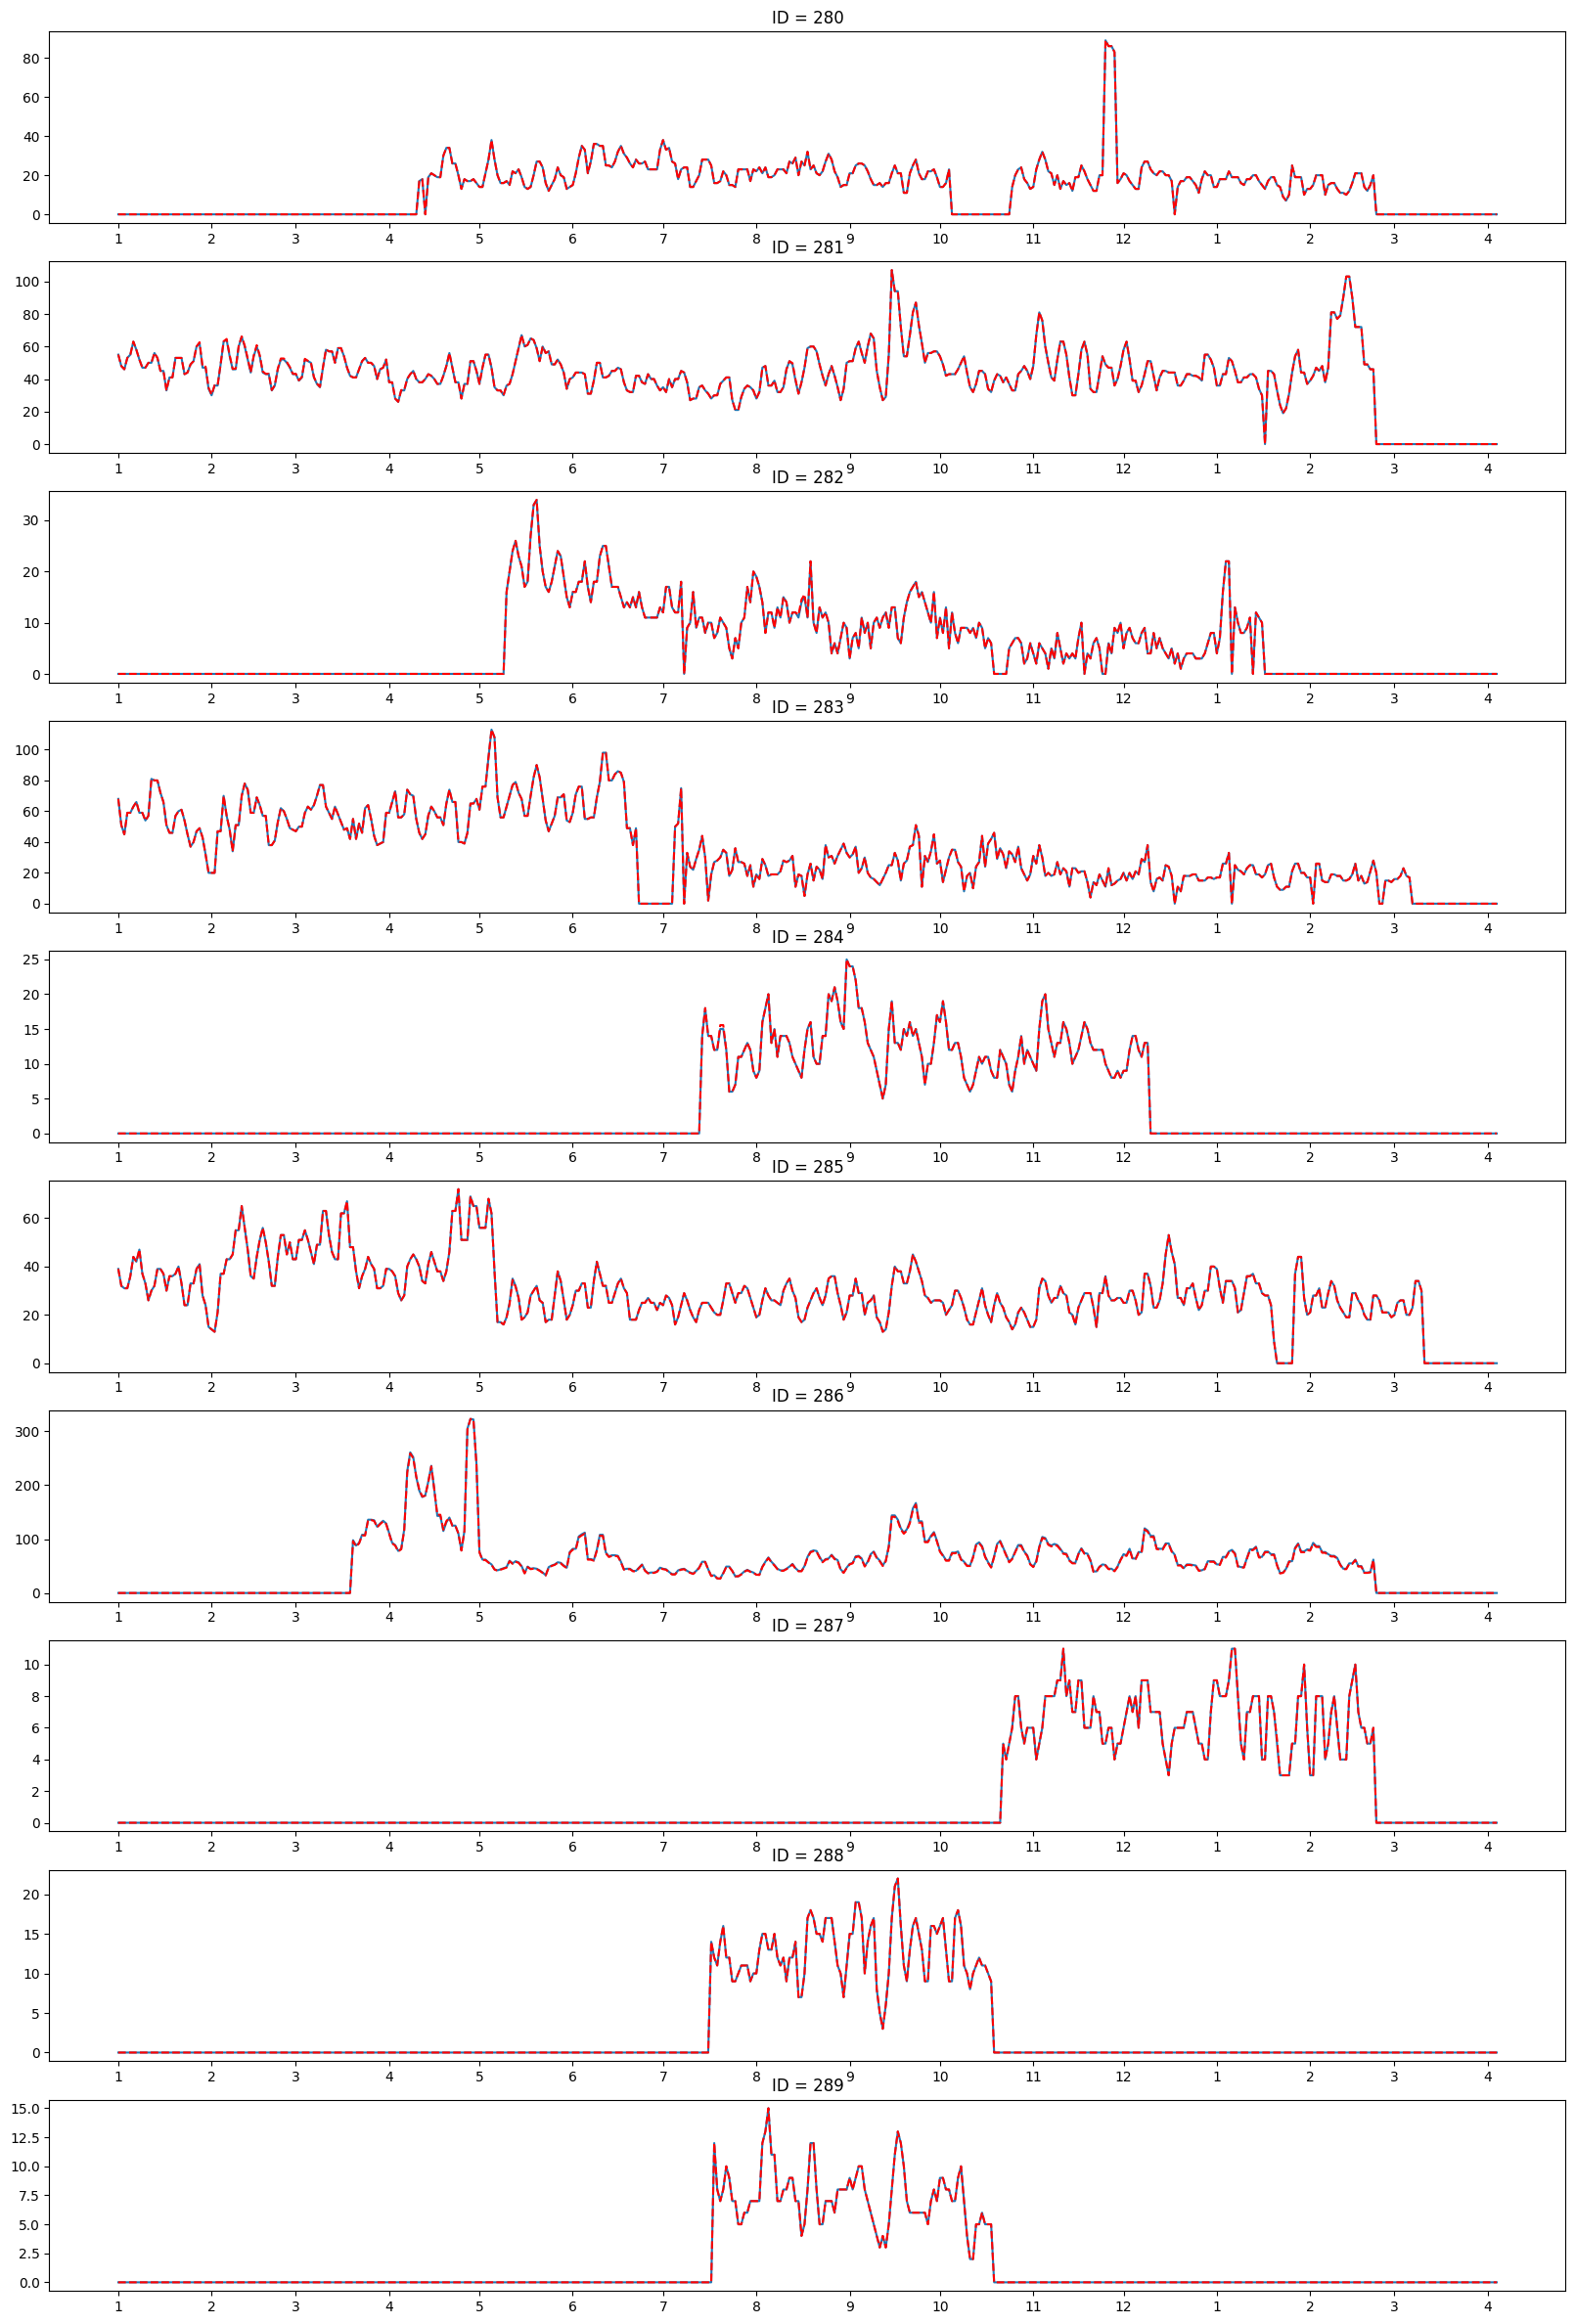

In [ ]:
# 판매량, 판매가격 비교
idx = 280

plt.figure(figsize=(20,30))
for i in range(idx, idx+10):
    plt.subplot(10, 1, i+1-idx)
    plt.plot(train.T[i][6:].values)
    plt.plot(sales.T[i][6:].values / np.max(sales.T[i][6:].values) * np.max(train.T[i][6:].values), color='r', linestyle='--')
    plt.xticks([0, 31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334, 365, 396, 424, 455], ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '1', '2', '3', '4'])
    plt.title(f'ID = {i}') # 26, 45
plt.show()

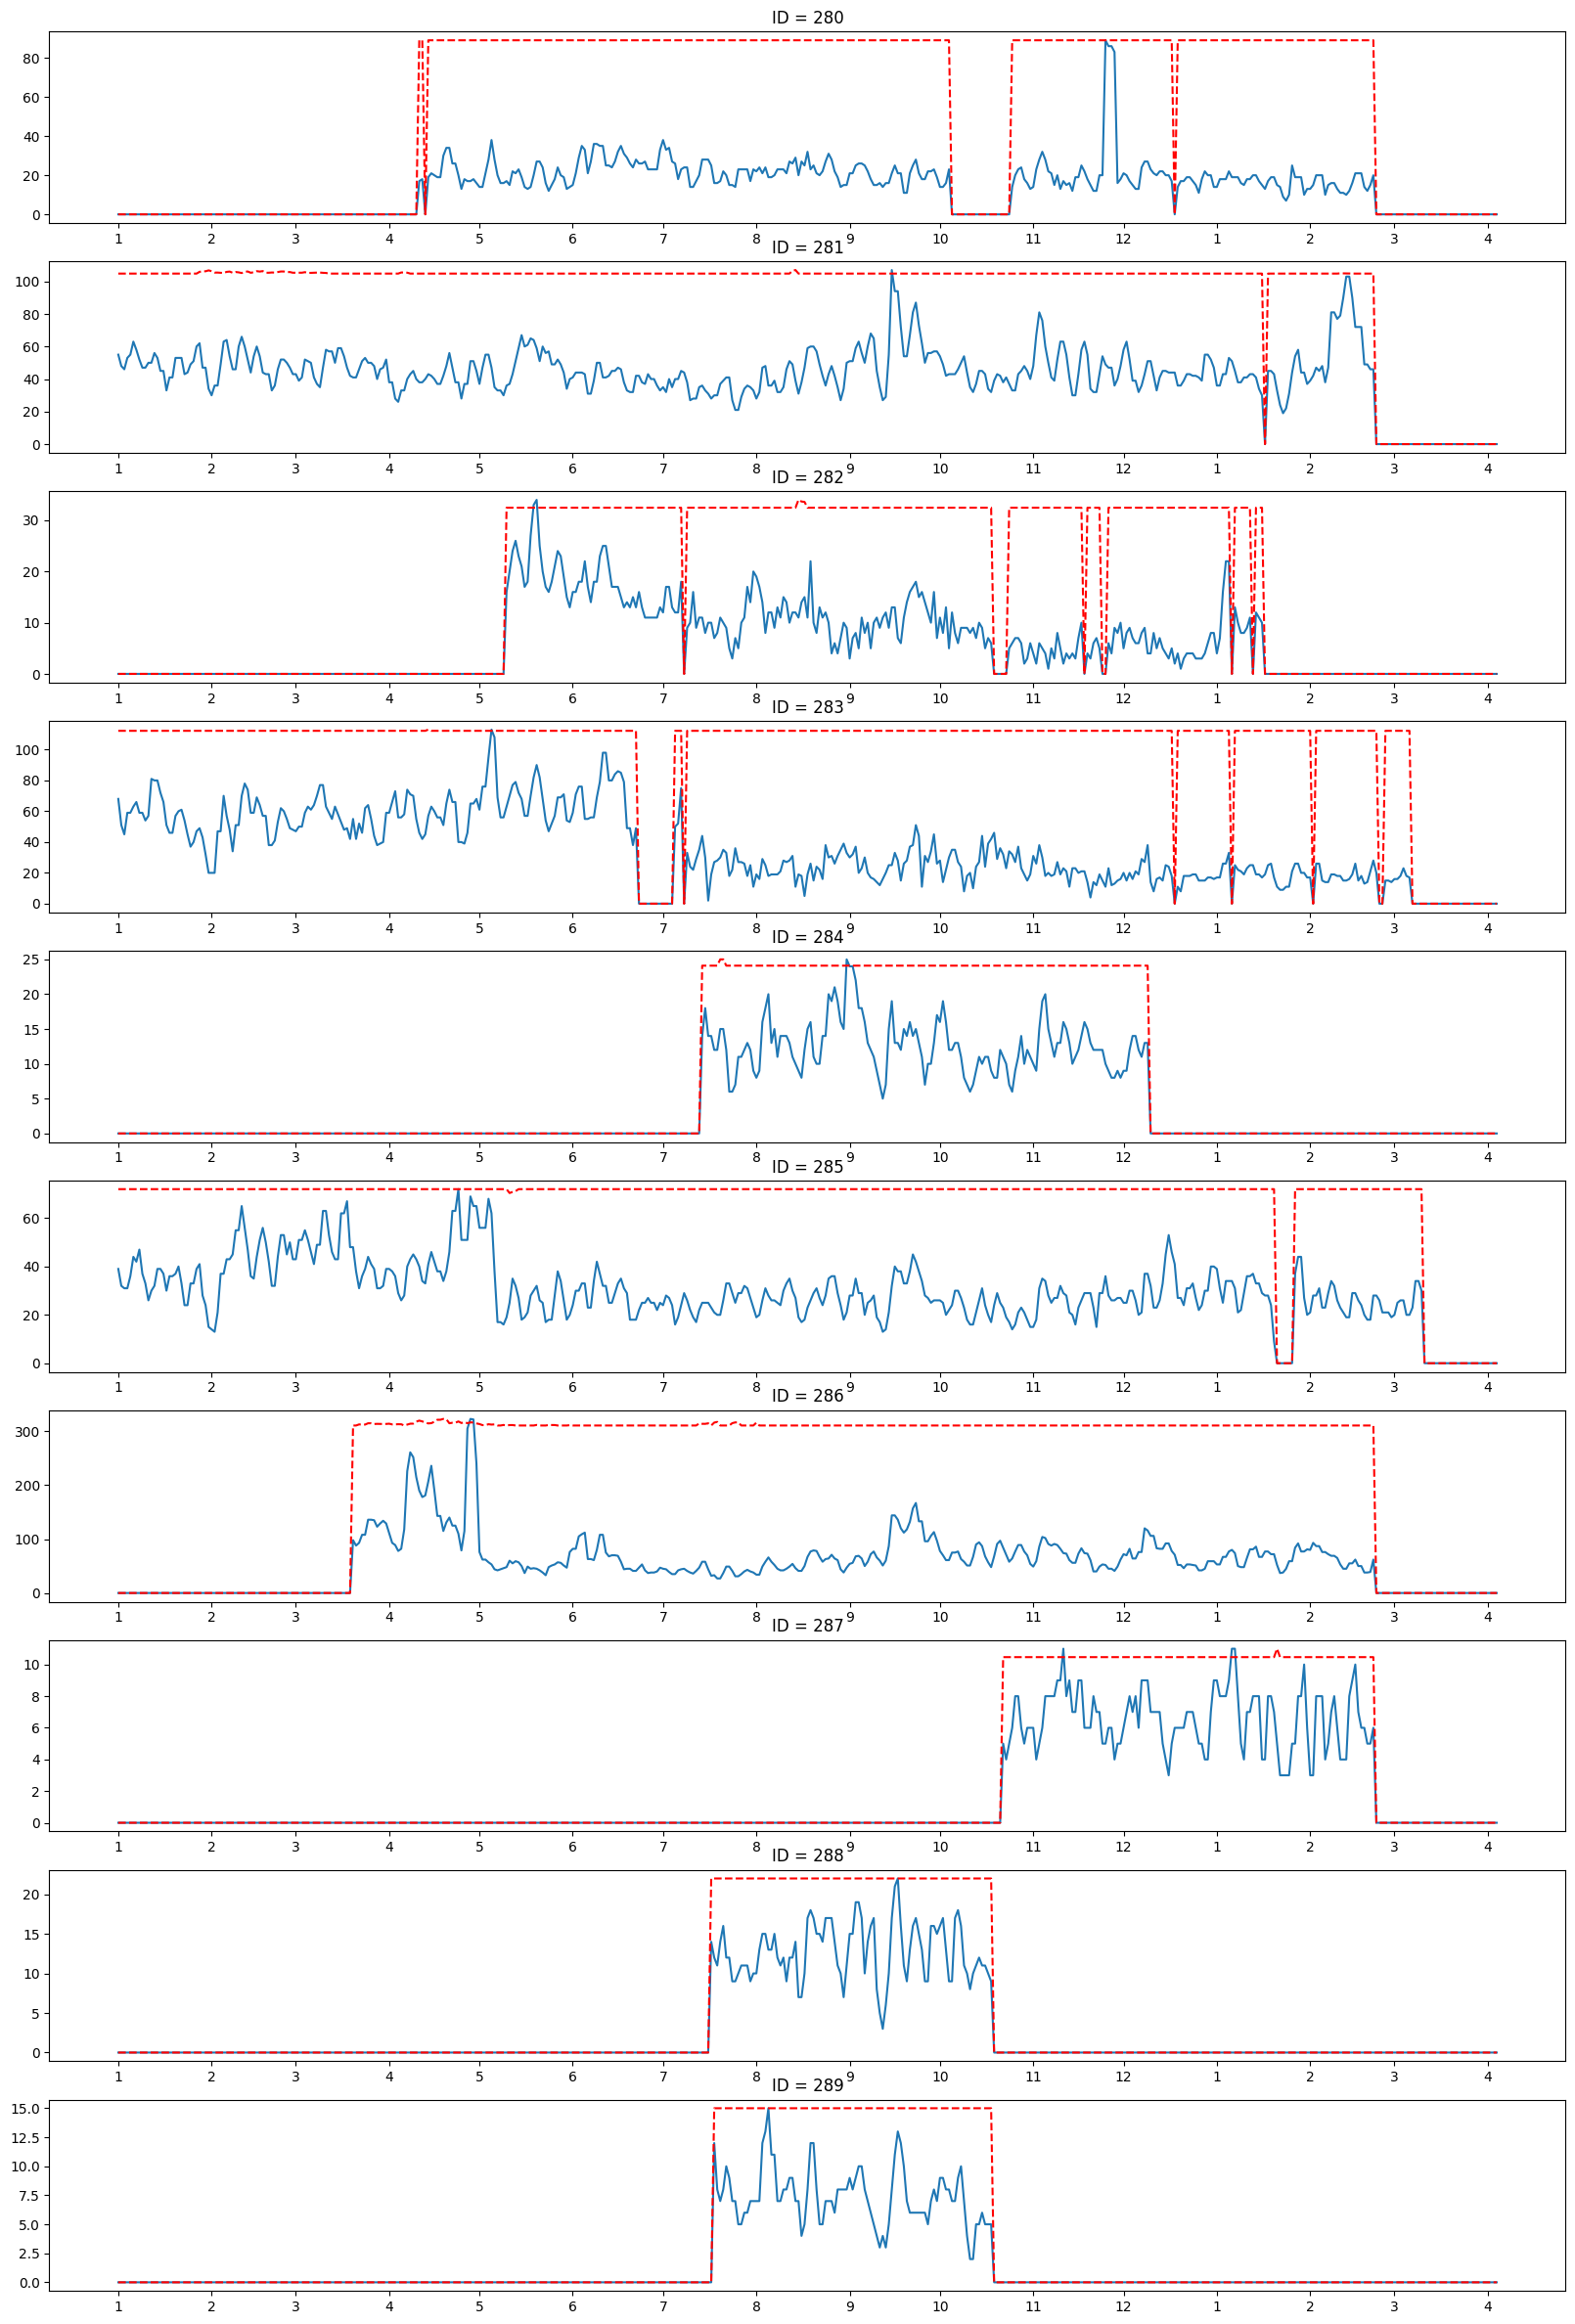

In [ ]:
# 판매량, 단위판매가격 비교
idx = 280

plt.figure(figsize=(20,30))
for i in range(idx, idx+10):
    plt.subplot(10, 1, i+1-idx)
    plt.plot(train.T[i][6:].values)
    tmp = sales.T[i][6:]
    tmp.loc[sales.T[i][6:] != 0] = tmp.loc[sales.T[i][6:] != 0] / train.T[i][6:][sales.T[i][6:] != 0]
    tmp = tmp / np.max(tmp) * np.max(train.T[i][6:].values)
    plt.plot(tmp, color='r', linestyle='--')
    plt.xticks([0, 31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334, 365, 396, 424, 455], ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '1', '2', '3', '4'])
    plt.title(f'ID = {i}') # 26, 45
plt.show()

In [ ]:
sales.T[i][6:][sales.T[i][6:] != 0] / train.T[i][6:][sales.T[i][6:] != 0]

2022-05-10    46000.0
2022-05-11    46000.0
2022-05-12    46000.0
2022-05-13    46000.0
2022-05-14    46000.0
               ...   
2023-01-11    46000.0
2023-01-12    46000.0
2023-01-14    46000.0
2023-01-15    46000.0
2023-01-16    46000.0
Name: 282, Length: 241, dtype: object

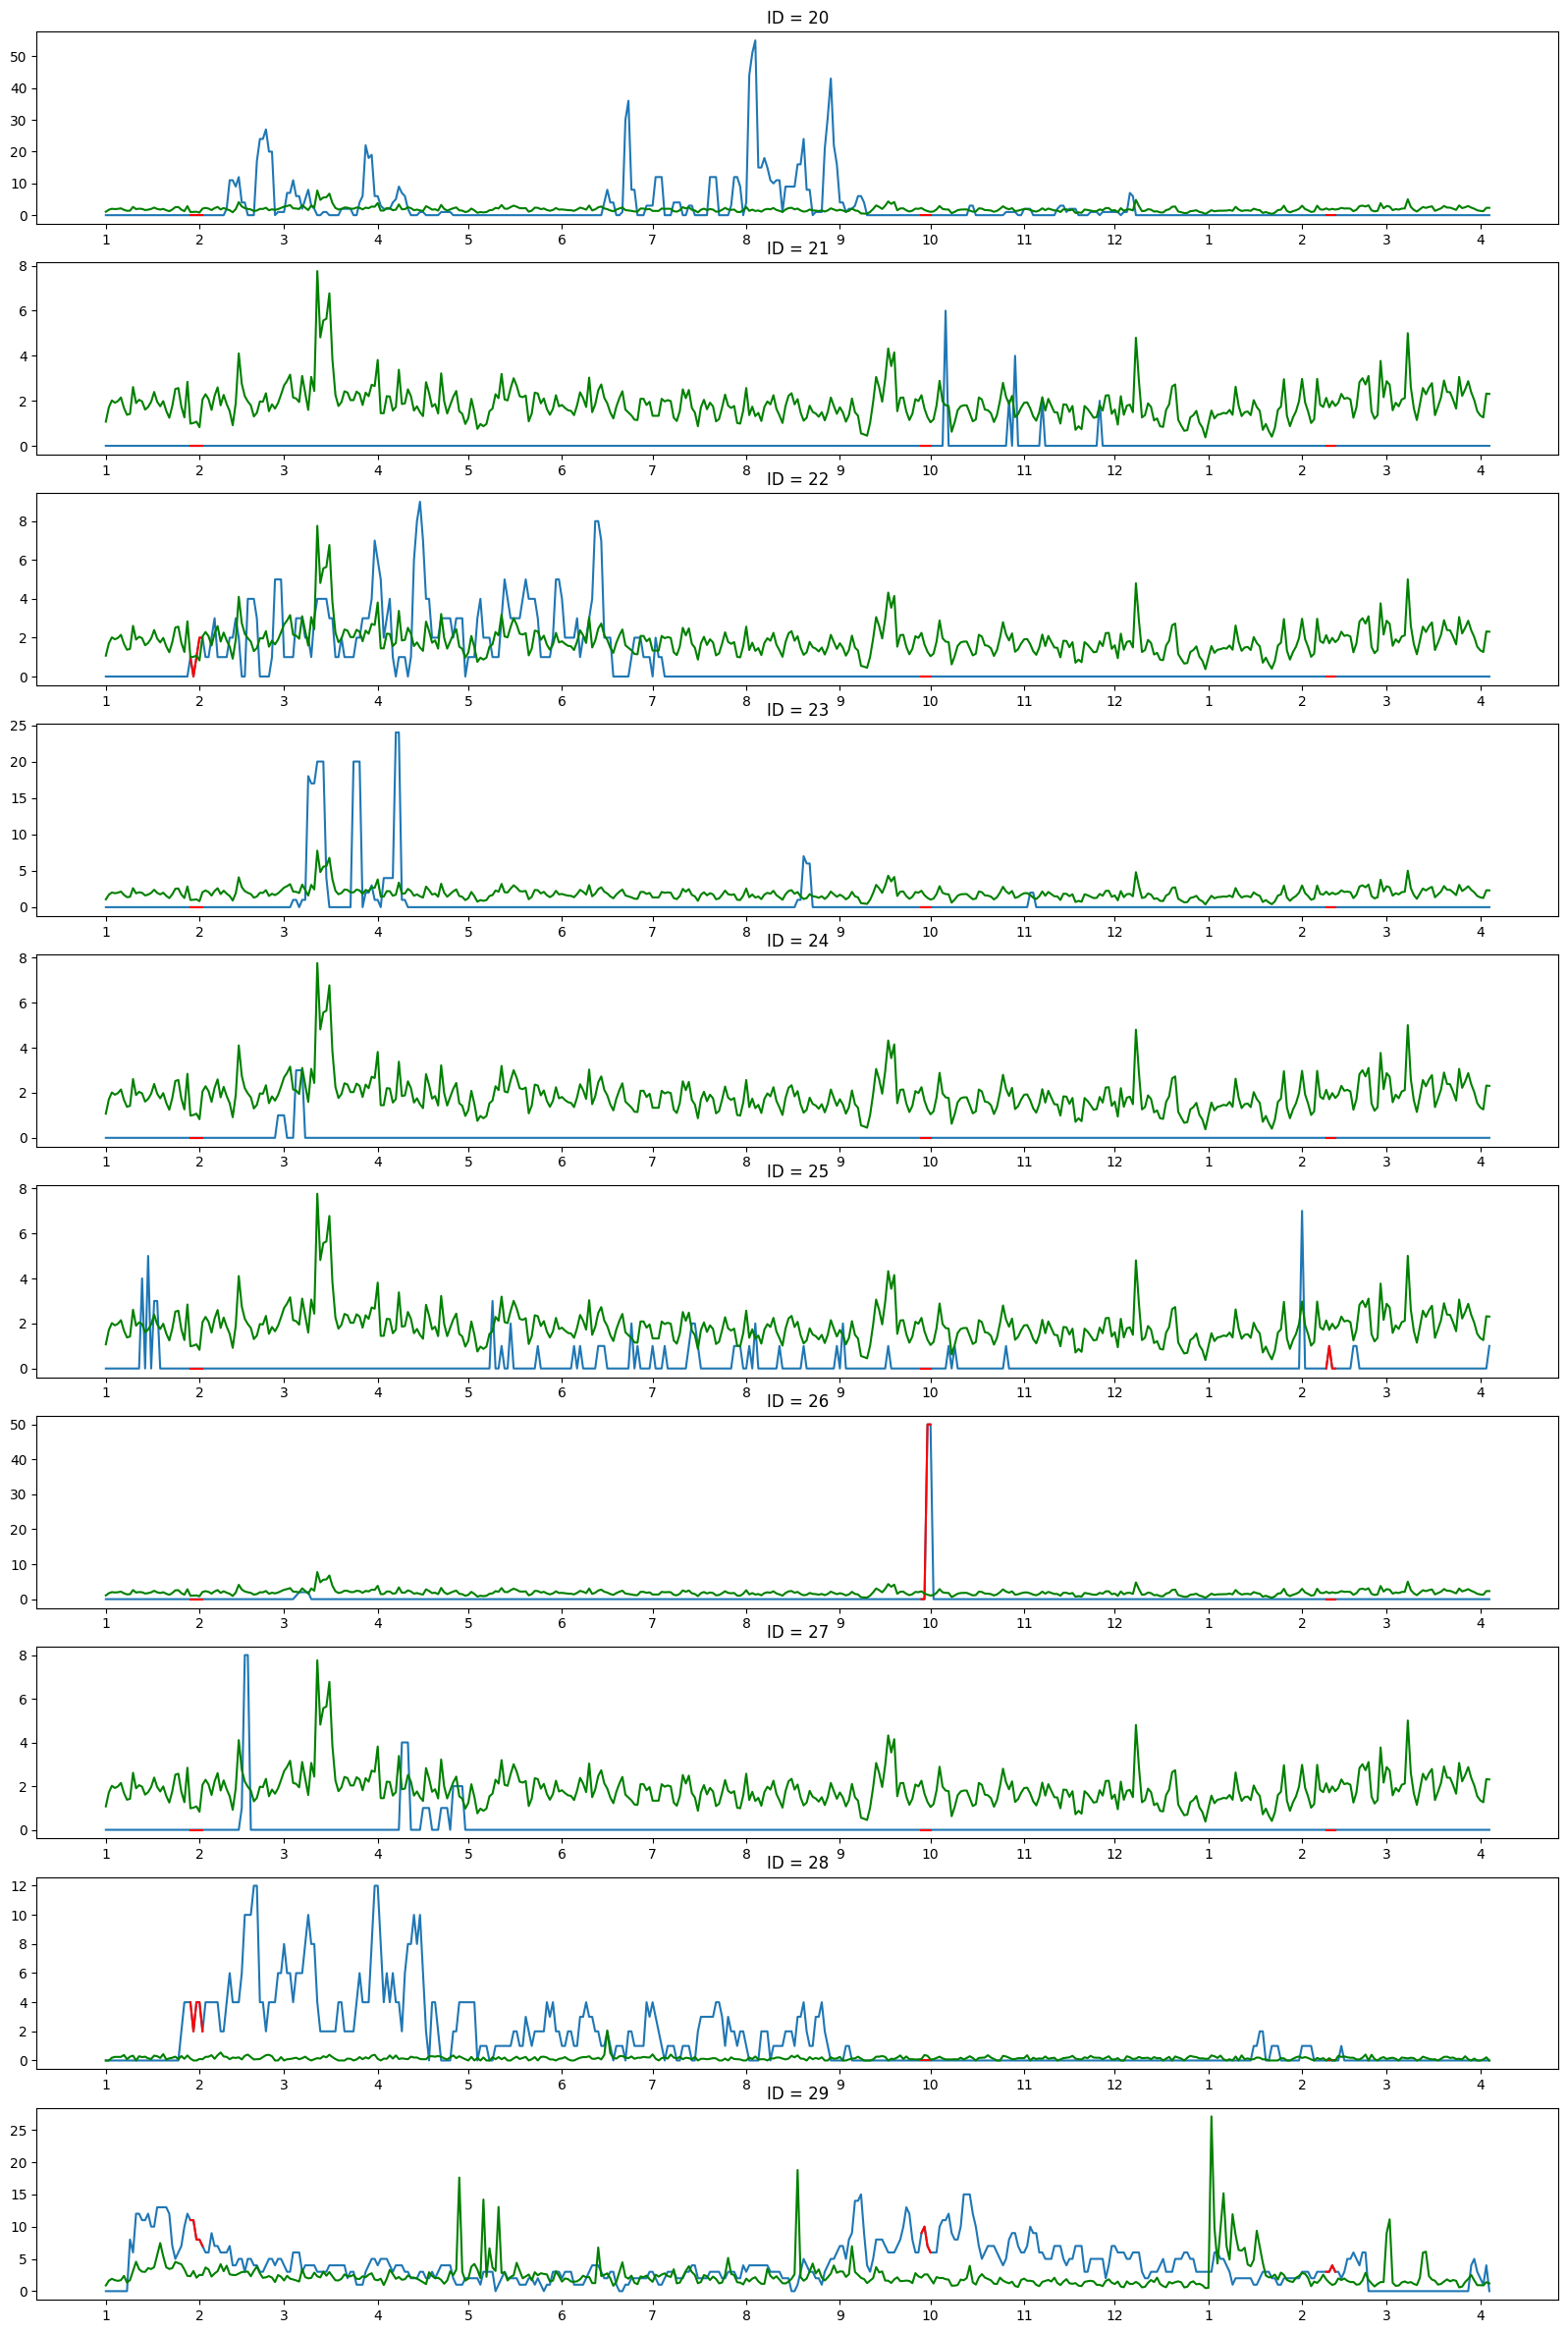

In [ ]:
# 연휴 비교
idx = 20

plt.figure(figsize=(20,30))
for i in range(idx, idx+10):
    plt.subplot(10, 1, i+1-idx)
    plt.plot(train.T[i][6:].values)
    plt.plot(range(28,33), train.T[i][34:39].values, color='r')
    plt.plot(range(270,274), train.T[i][276:280].values, color='r')
    plt.plot(range(404,408), train.T[i][410:414].values, color='r')
    plt.plot(brand[brand['브랜드'] == train.T[i]['브랜드']].iloc[:, 1:].values[0], color='g')
    plt.xticks([0, 31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334, 365, 396, 424, 455], ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '1', '2', '3', '4'])
    plt.title(f'ID = {i}') # 26, 45
plt.show()

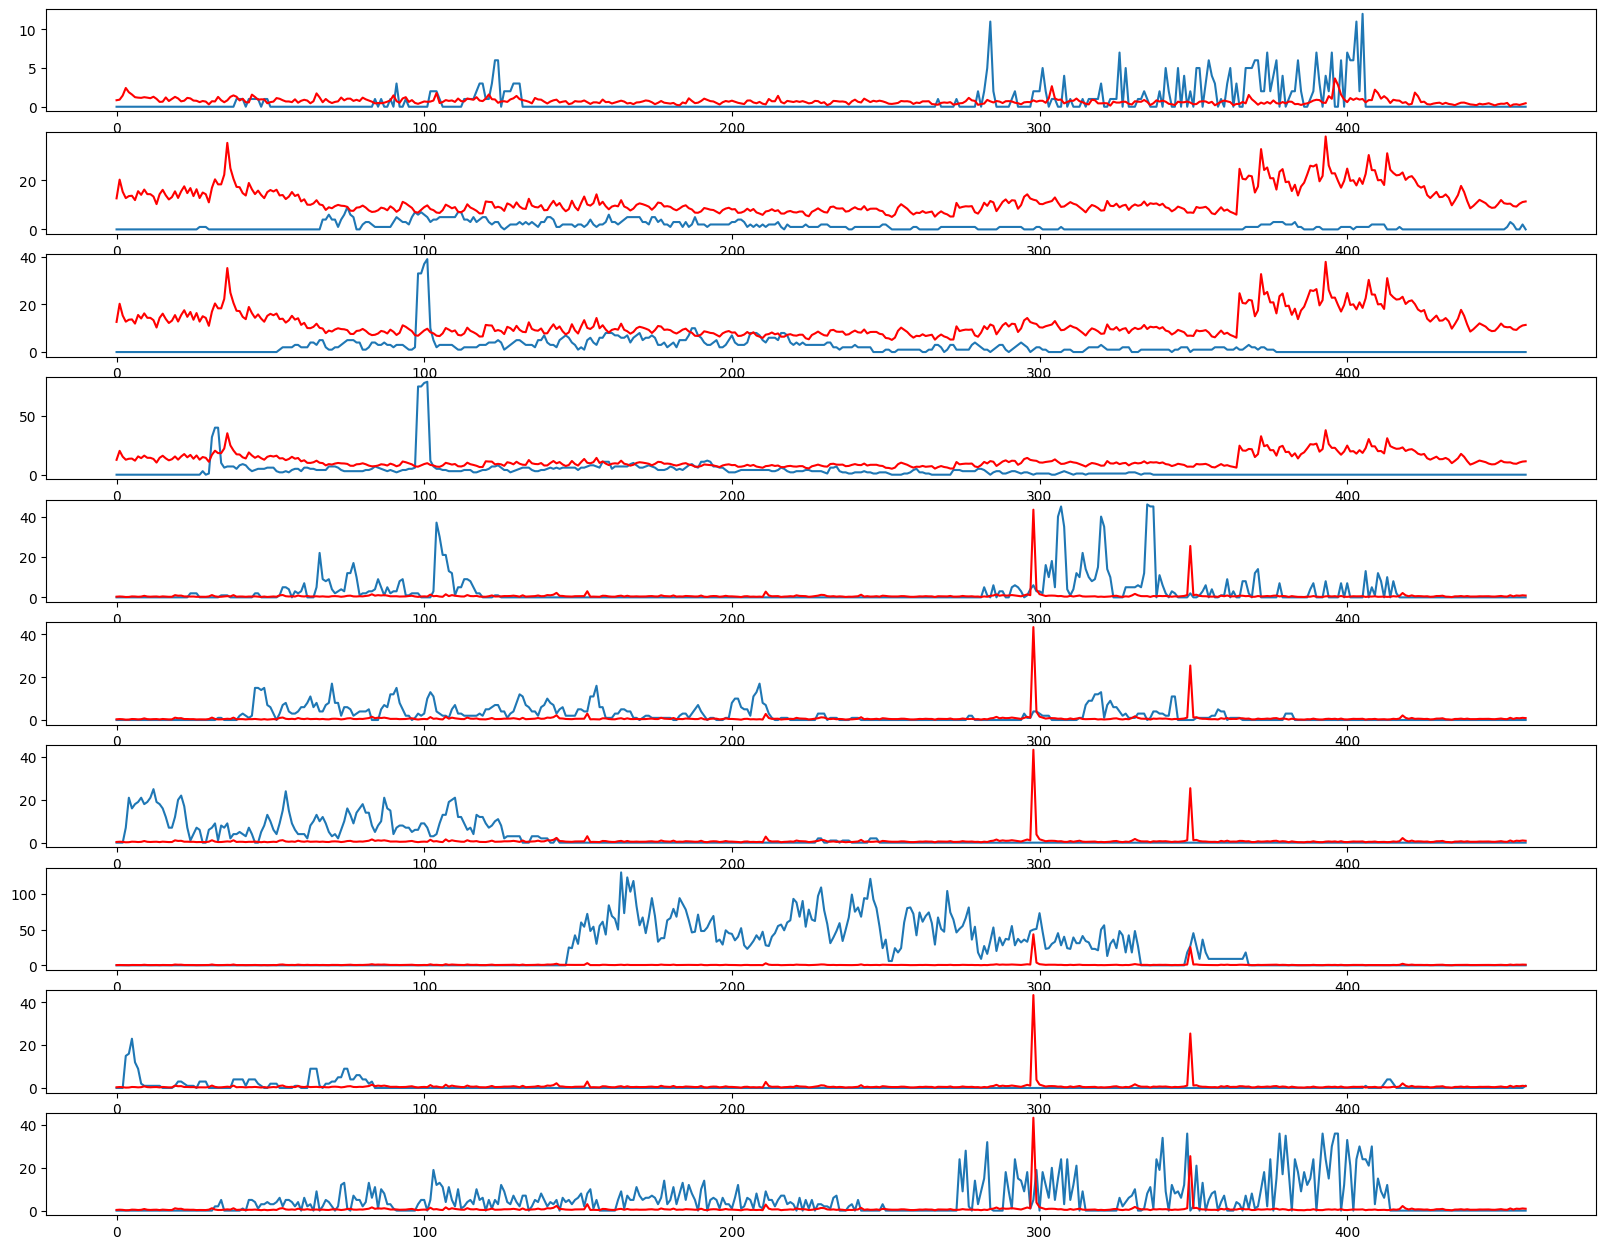

In [ ]:
plt.figure(figsize=(20,30))
for i in range(10):
    plt.subplot(19,1,i+1)
    plt.plot(train.T[i][6:].values)
    plt.plot(brand[brand['브랜드'] == train.T[i]['브랜드']].iloc[:, 1:].values[0], color='r')
plt.show()

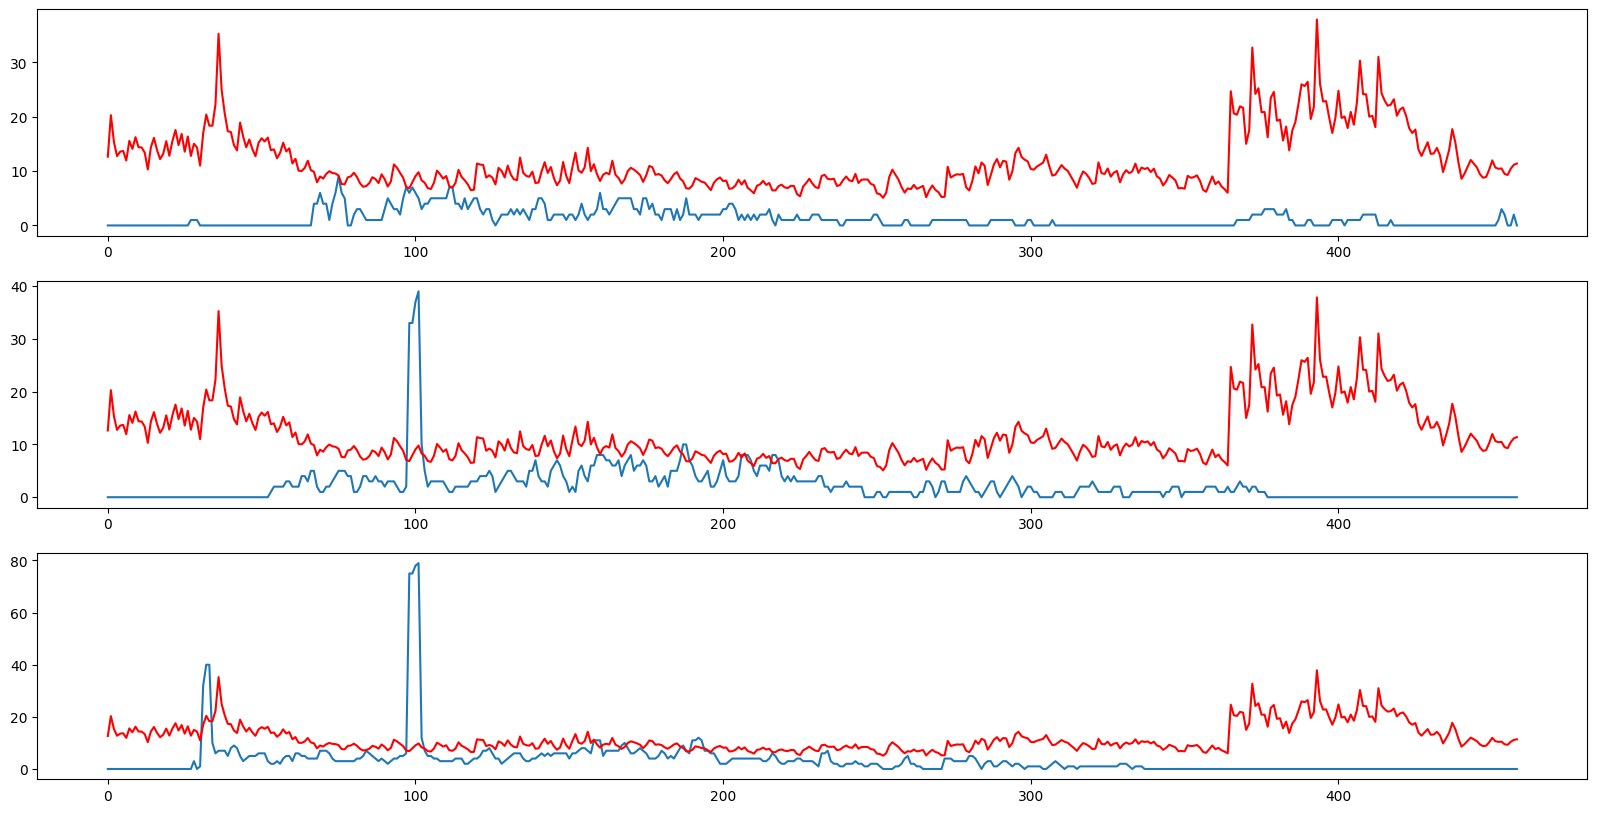

In [ ]:
tmp = train[train['브랜드'] == 'B002-00002']
plt.figure(figsize=(20,10))
for i in range(len(tmp)):
    plt.subplot(len(tmp),1,i+1)
    plt.plot(tmp.iloc[i, 6:].values)
    plt.plot(brand[brand['브랜드'] == 'B002-00002'].iloc[:, 1:].values[0], color='r')
plt.show()

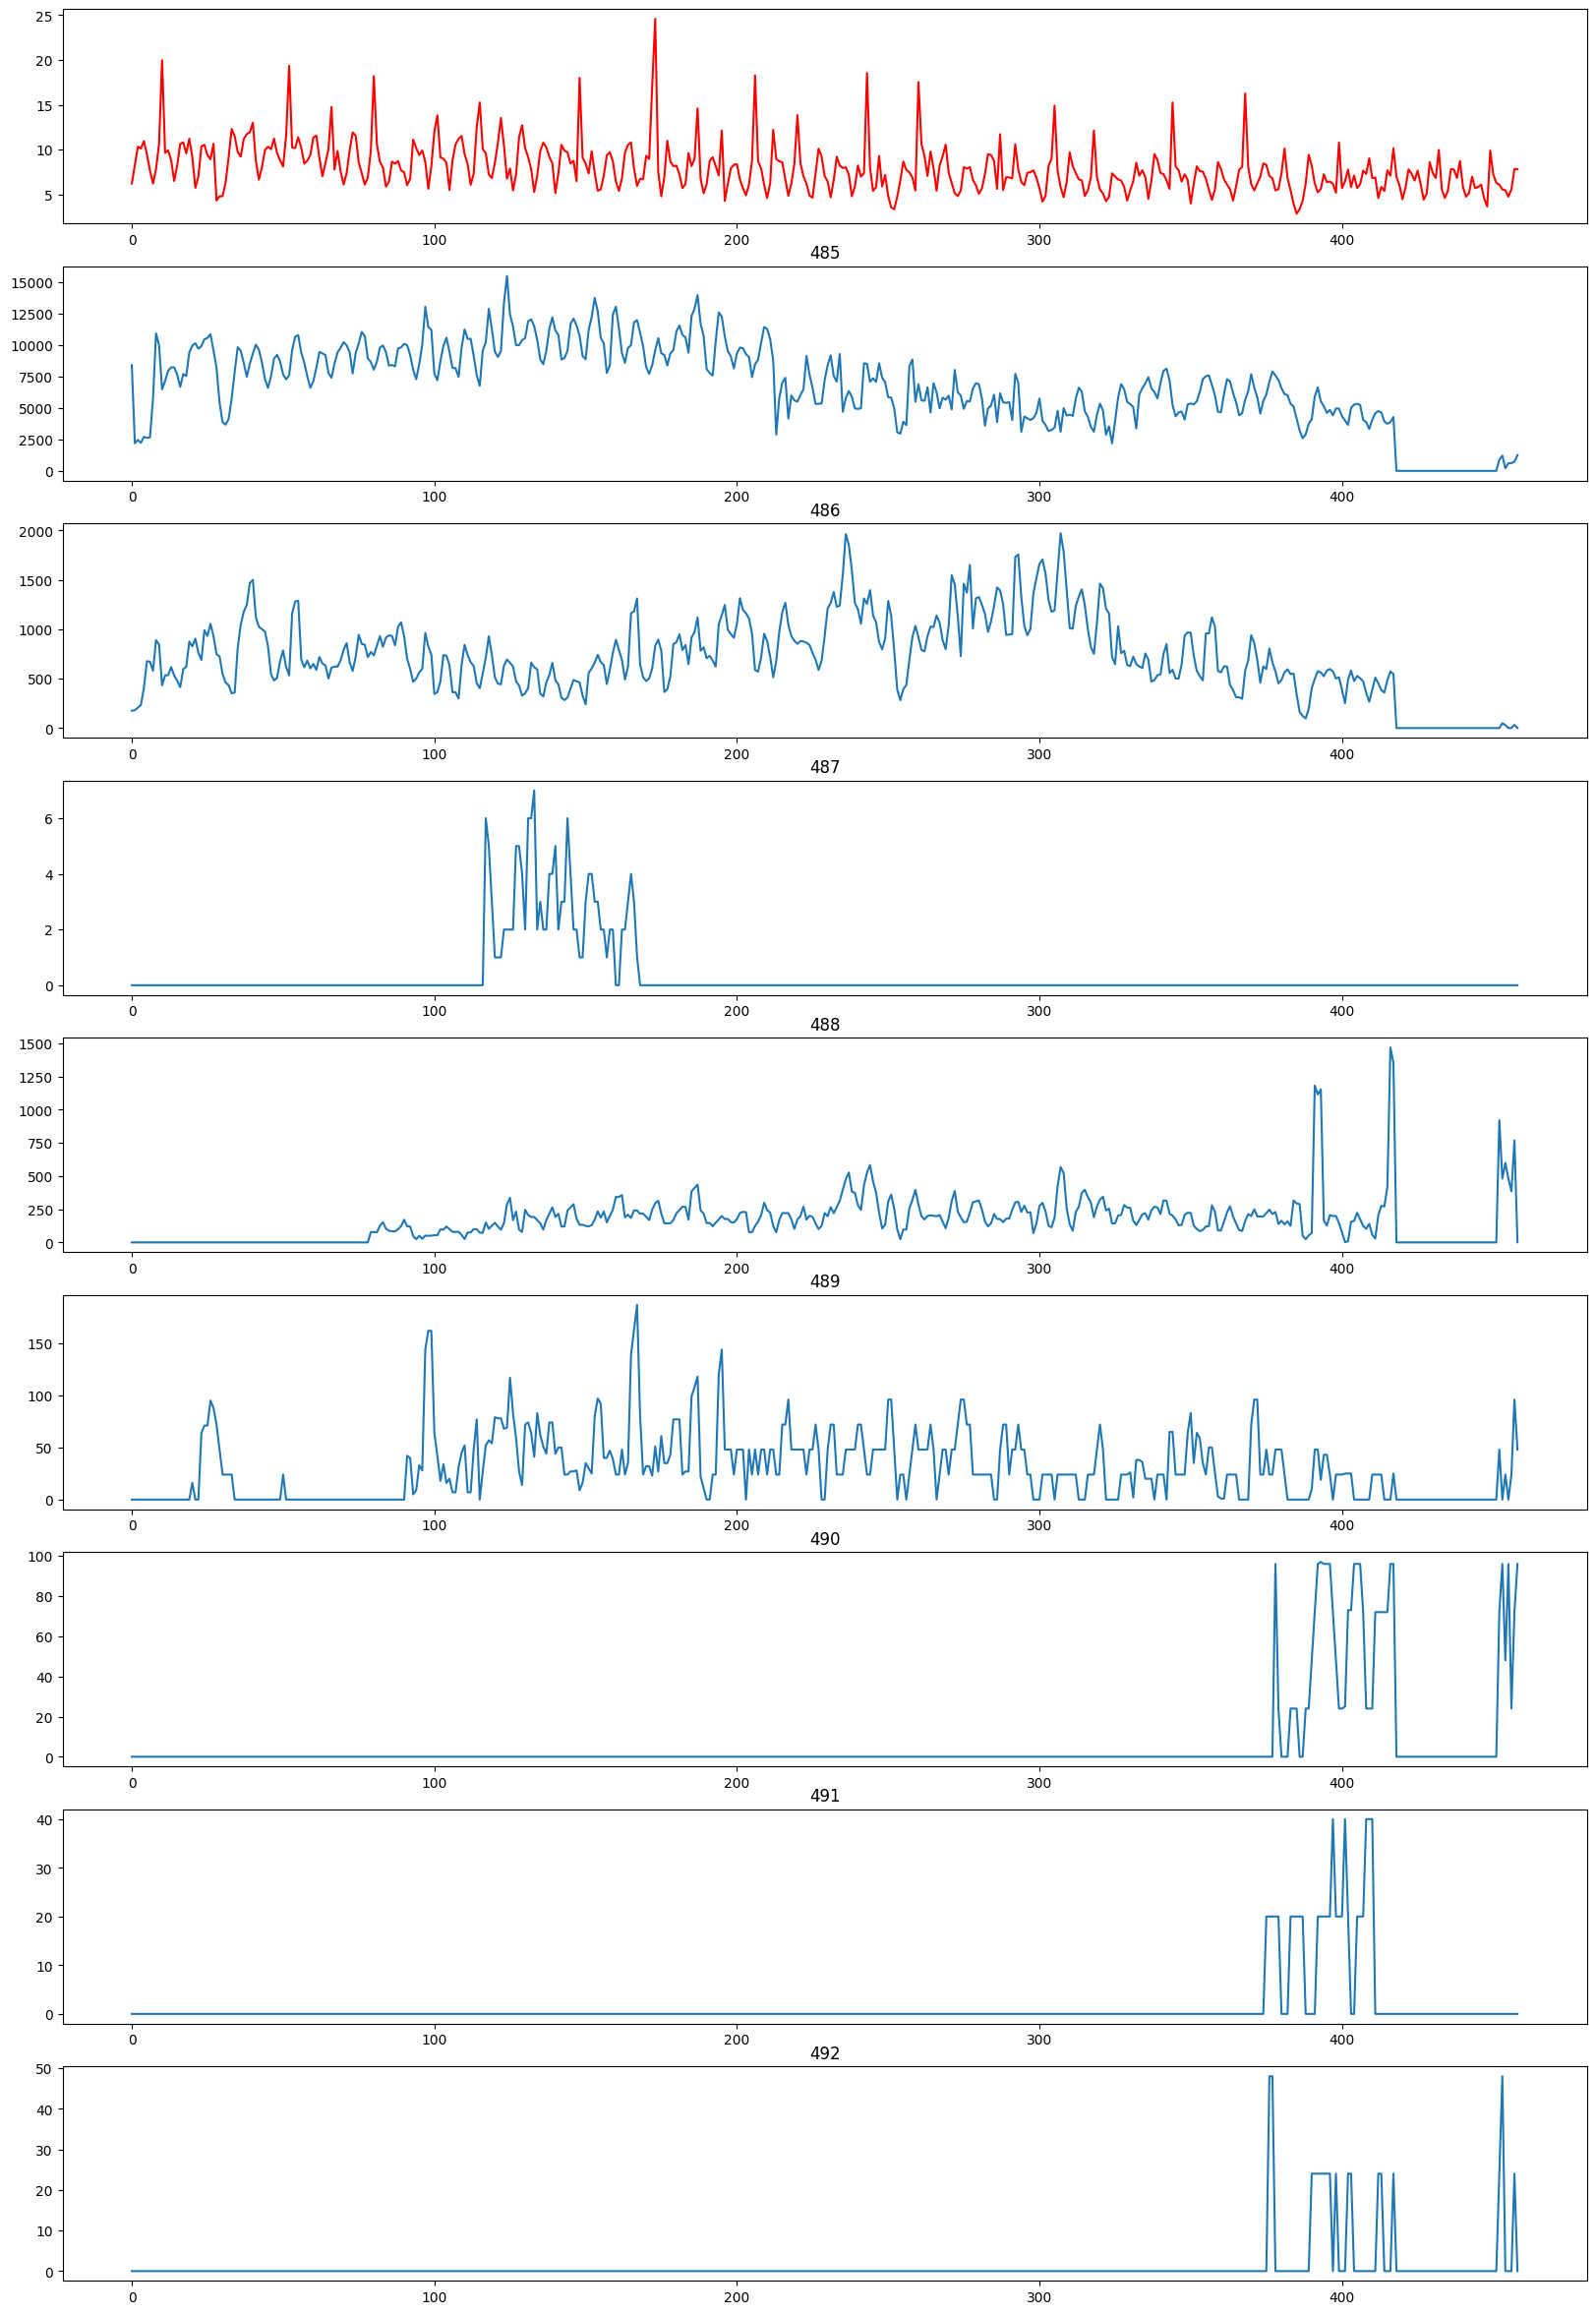

In [ ]:
tmp = train[train['브랜드'] == train.iloc[485]['브랜드']]
plt.figure(figsize=(20,30))
plt.subplot(len(tmp)+1, 1, 1)
plt.plot(brand[brand['브랜드'] == train.iloc[485]['브랜드']].iloc[:, 1:].values[0], color='r')
for i in range(len(tmp)):
    plt.subplot(len(tmp)+1,1,i+2)
    plt.plot(tmp.iloc[i, 6:].values)
    plt.title(tmp.iloc[i]['ID'])
plt.show()

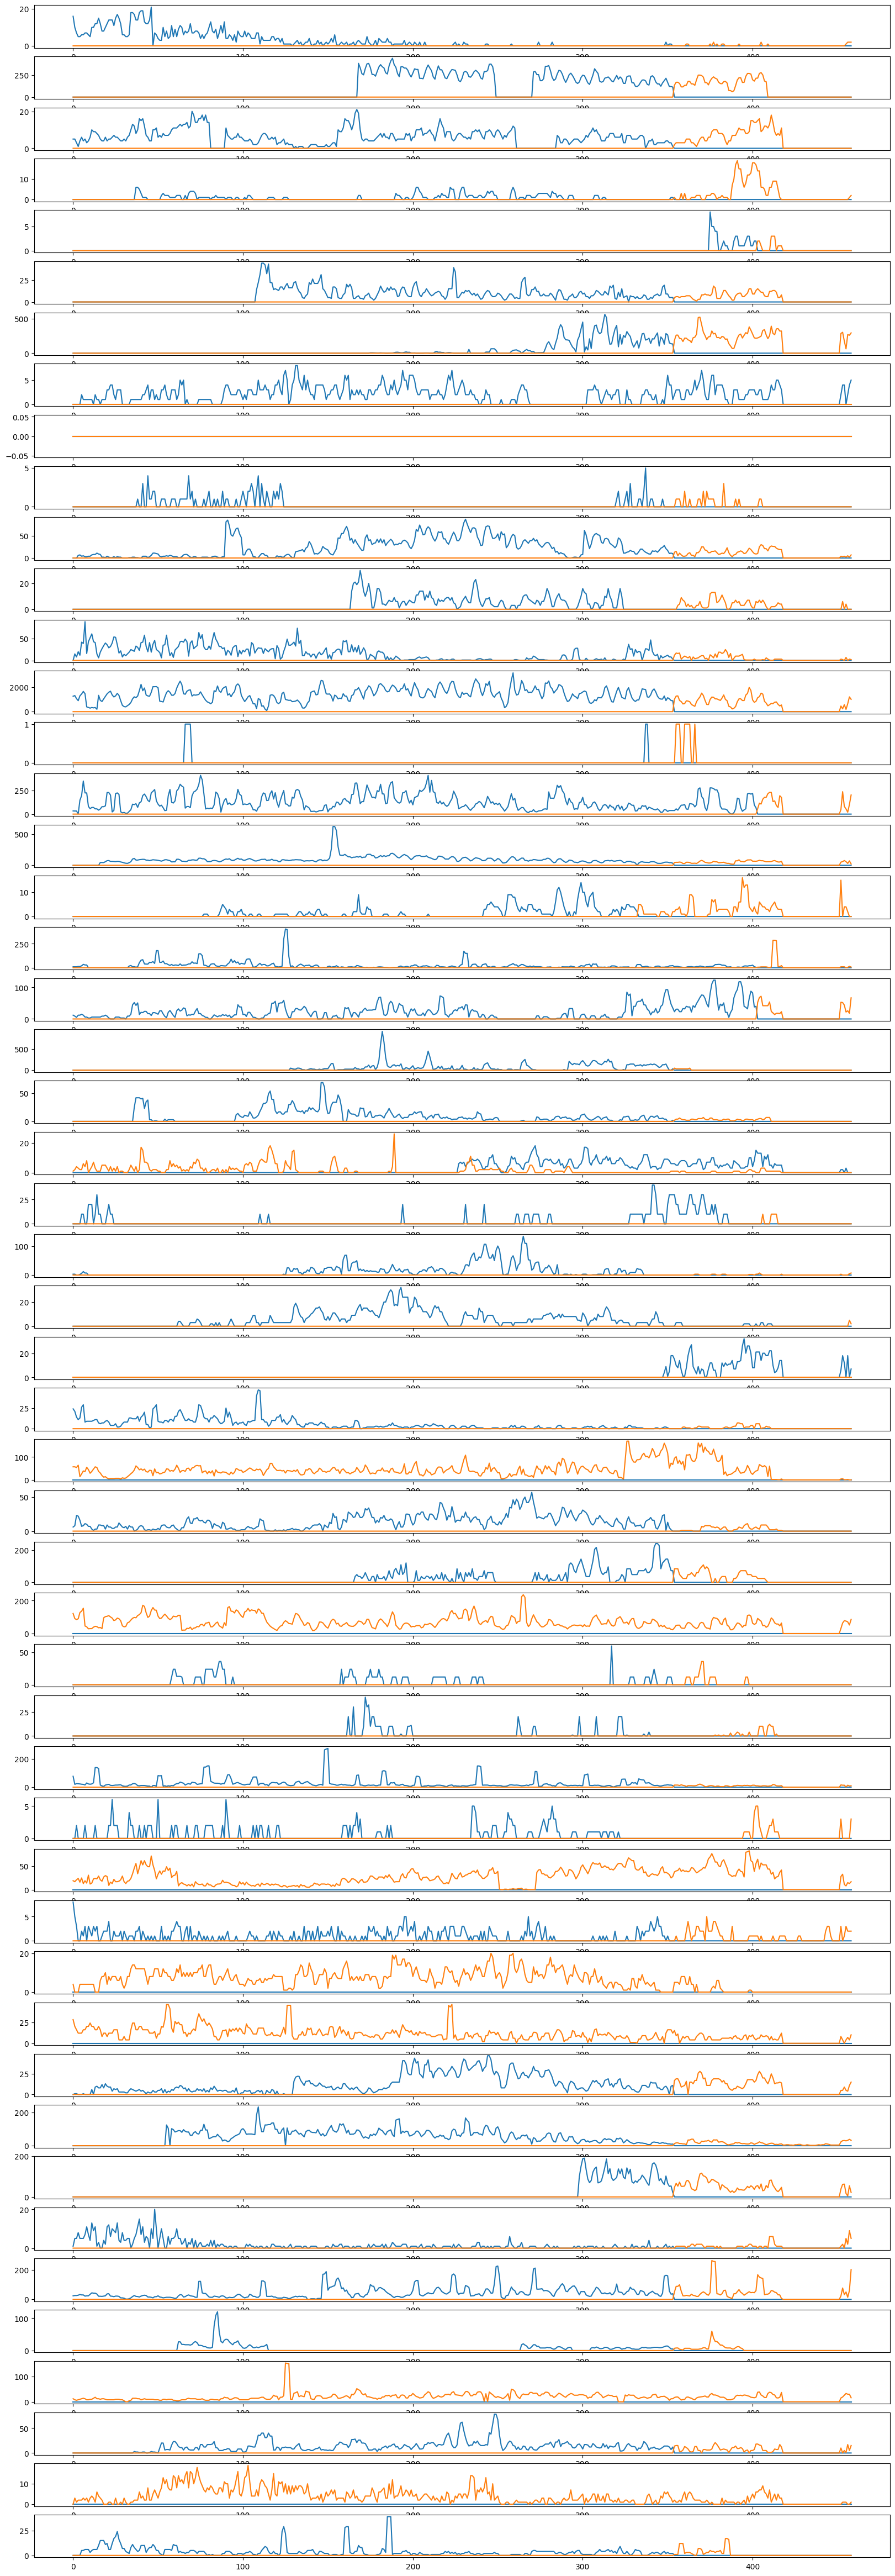

In [ ]:
dup_product = train['제품'].value_counts()[train['제품'].value_counts() == 2].index
plt.figure(figsize=(20,60))
for i in range(len(dup_product)):
    plt.subplot(len(dup_product), 1, i+1)
    p_name = dup_product[i]
    tmp = train[train['제품'] == p_name]
    plt.plot(tmp.T.iloc[6:, 0].values)
    plt.plot(tmp.T.iloc[6:, 1].values)
plt.show()

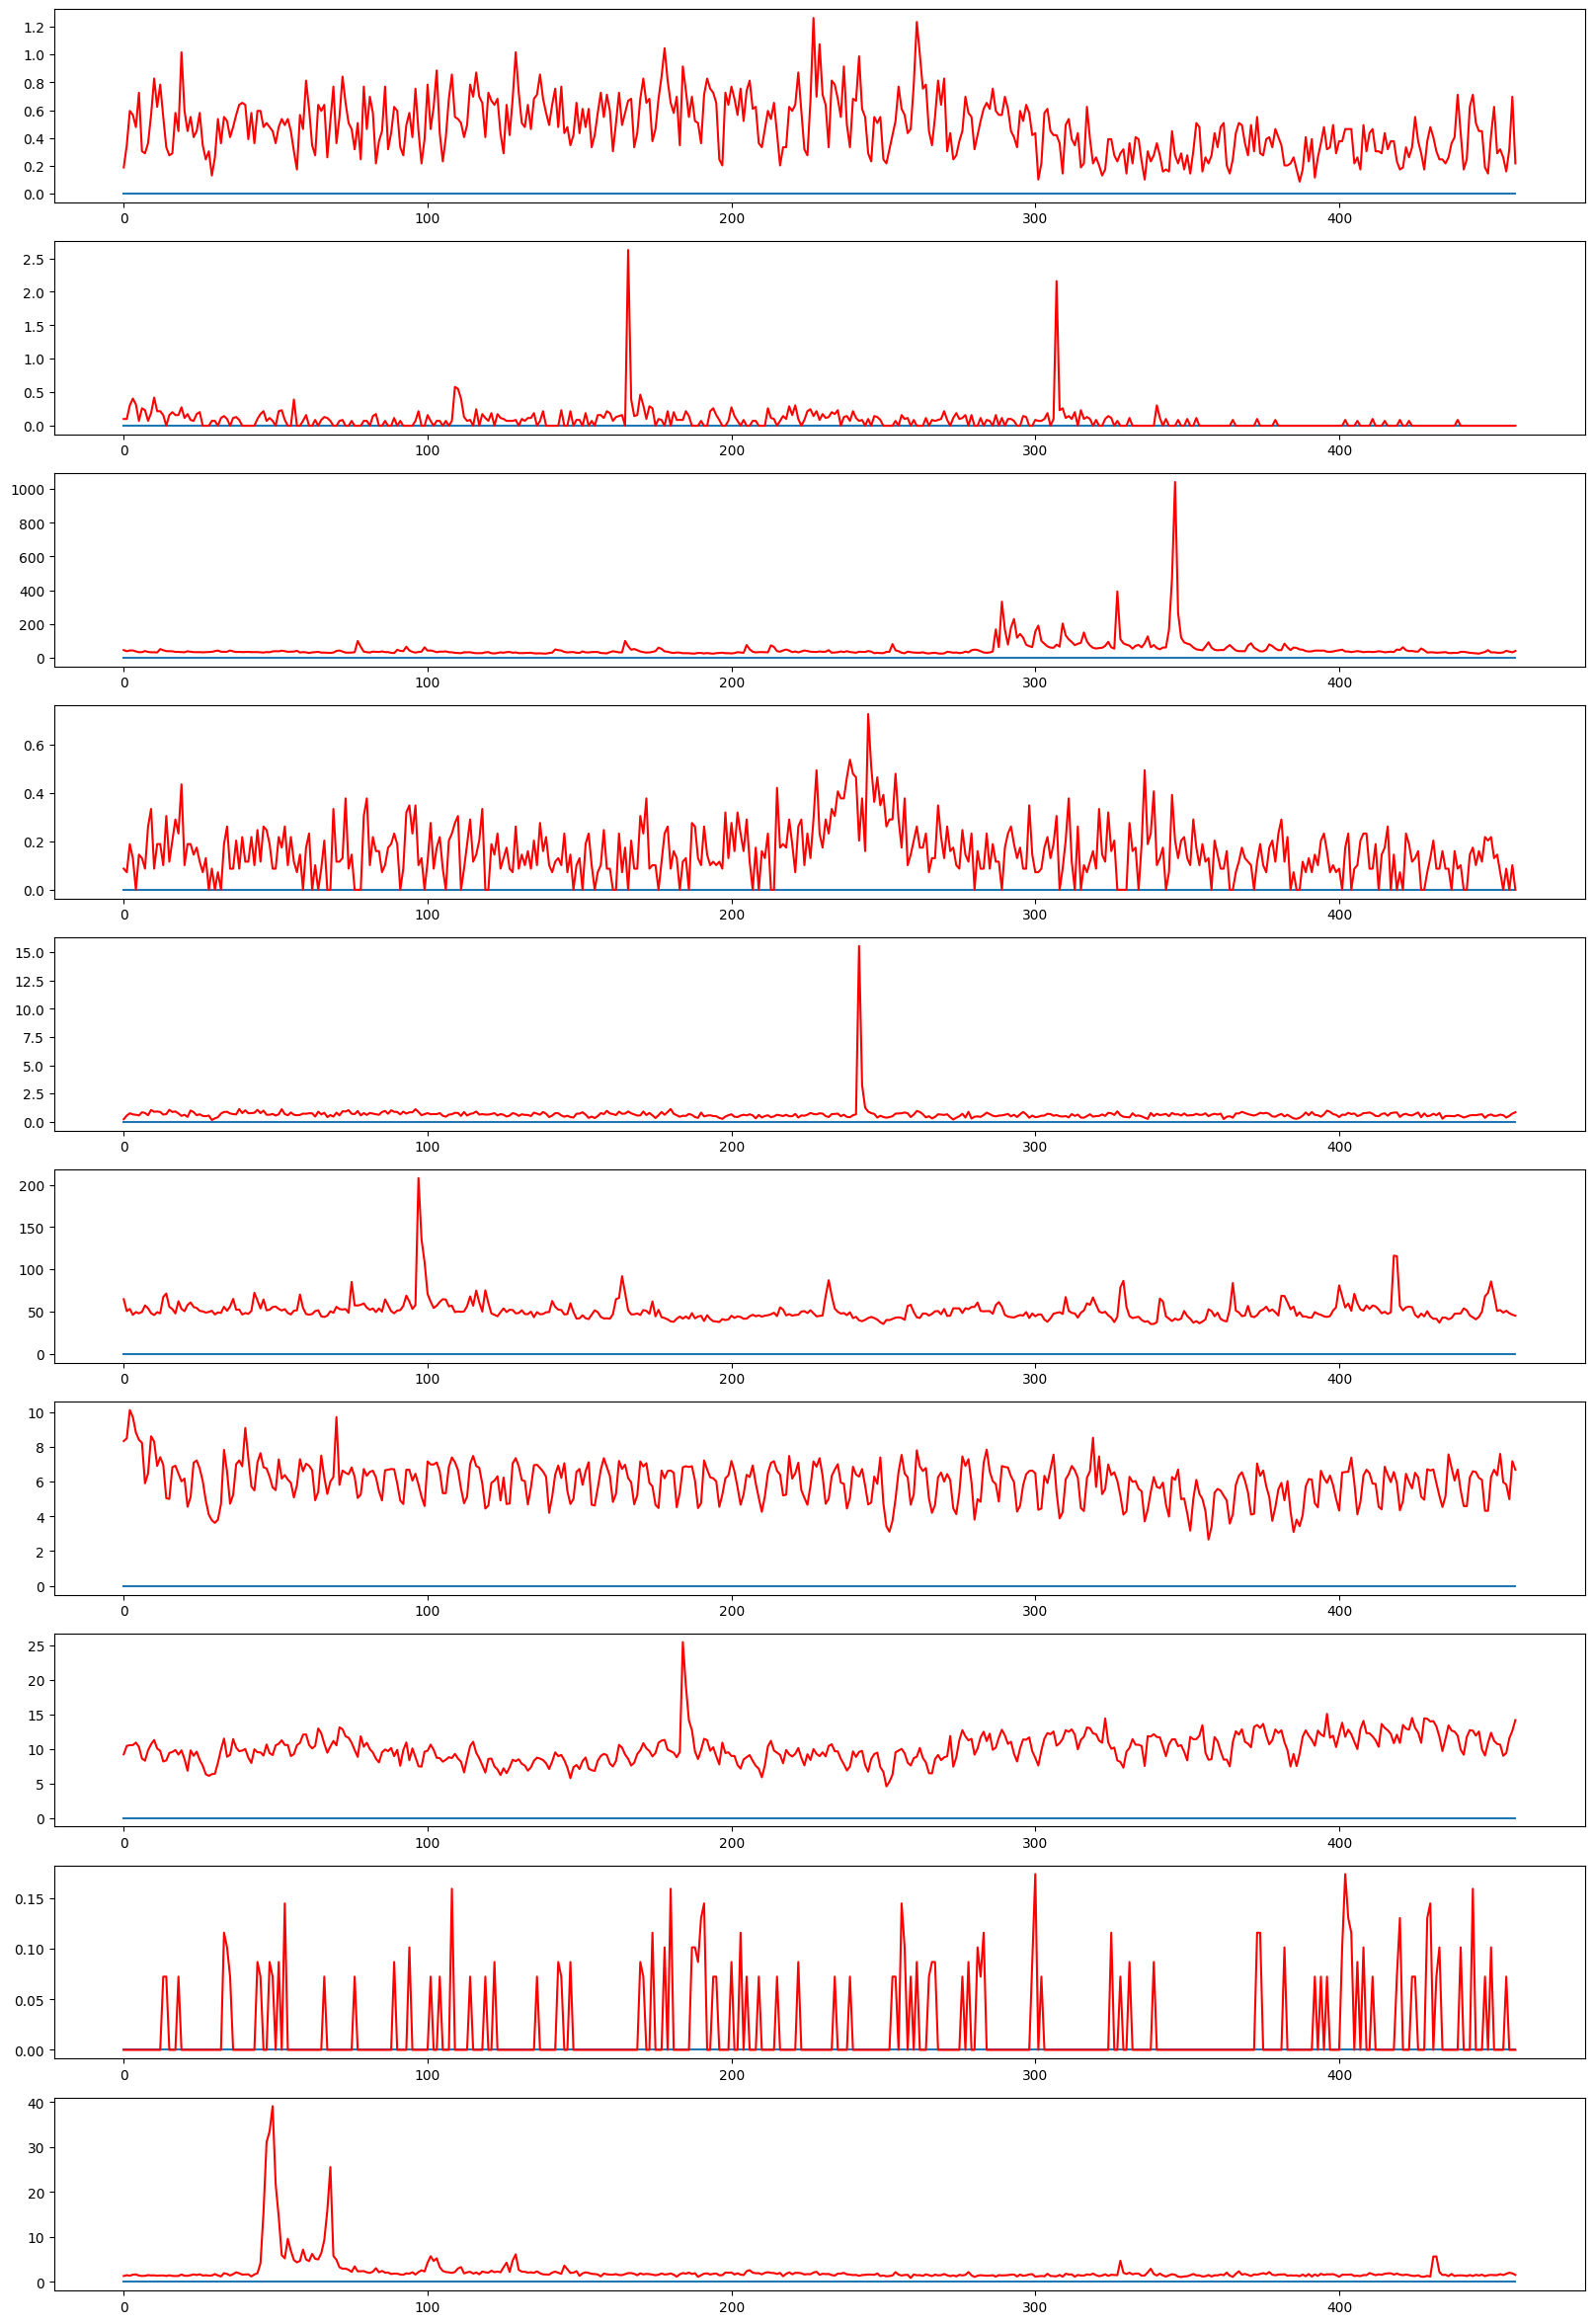

In [ ]:
tmp = train[train.iloc[:, 6:].sum(axis=1) == 0]

plt.figure(figsize=(20,30))
for i in range(10):
    plt.subplot(10,1,i+1)
    plt.plot(tmp.iloc[i, 6:].values)
    plt.plot(brand[brand['브랜드'] == tmp.iloc[i]['브랜드']].iloc[:, 1:].values[0], color='r')
plt.show()

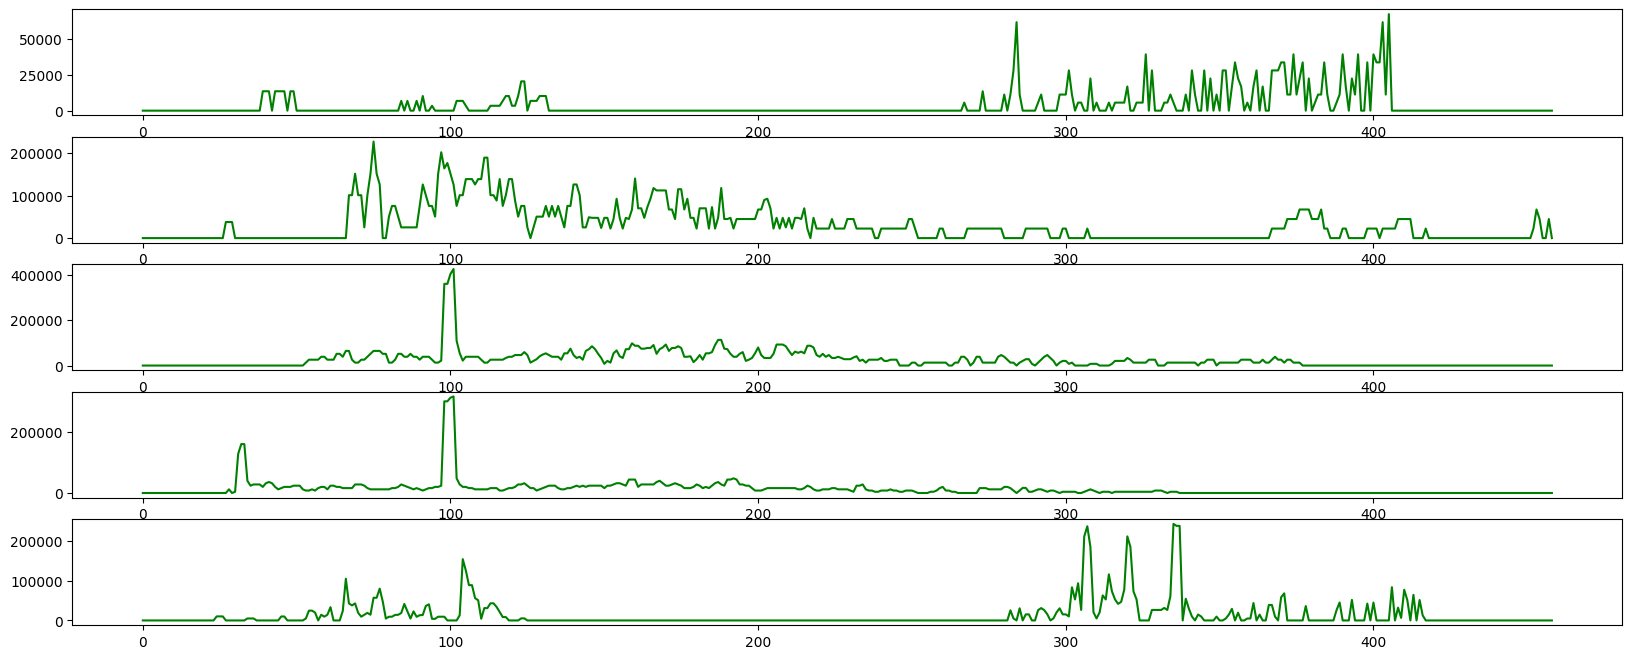

In [ ]:
plt.figure(figsize=(20,8))
for i in range(5):
    plt.subplot(5,1,i+1)
    plt.plot(sales.T[i][6:].values, color='g')
plt.show()